**Chapter 3 – Classification**

_This notebook contains all the sample code and solutions to the exercices in chapter 3._

# Chapter 3, p91- (171002) 

 #### Precision and recall以降のパートを担当。
 

Precision and recallのために、最初はChapter 3の前回の部分を読み込み。

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# MNIST
70,000 の手書きの数字のイメージにに、その画像が表す数字がラベルされているデータセット。

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] # テストとトレーニングに分割
shuffle_index = rnd.permutation(60000) 
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
y_train_5 = (y_train == 5) # 5 かどうかの判別に用いるboolのarrayを作成
y_test_5 = (y_test == 5) 
some_digit_index = 36000 # 例題として1つピックしておく。
some_digit = X[some_digit_index]

# Binary classifier

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/Users/ac144809/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [4]:
#confusion matrixの作成。[[TN, FP],[FN, TP]]が格納されている
print(y_train_pred) # 予測結果が格納されている
print(y_train_pred.shape)
confusion_matrix(y_train_5, y_train_pred)

[False False False ..., False False False]
(60000,)


array([[53272,  1307],
       [ 1077,  4344]])

結果は以下の通り:
TN: 53272, FP: 1307, FN: 1077, TP: 4344
## Precision and recall

適合率 (精度, precision)：正と予測したデータのうち，実際に正であるものの割合。
Precision = TP / (TP+FP)

再現率 (recall)：実際に正であるもののうち，正であると予測されたものの割合。
Recall = TP / (TP+FN)

F値 (F尺度, F-measure)：適合率と再現率の調和平均。
2×Recall×Precision / (Recall+Precision)


In [5]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

print("precision_score(y_train_5, y_train_pred): ", precision_score(y_train_5, y_train_pred))
print("4344 / (4344 + 1307) = ", 4344 / (4344 + 1307) ) # TP / (TP + FP)

precision_score(y_train_5, y_train_pred):  0.768713502035
4344 / (4344 + 1307) =  0.7687135020350381


In [6]:
print("recall_score(y_train_5, y_train_pred): ", recall_score(y_train_5, y_train_pred))
print("4344 / (4344 + 1077) = ", 4344 / (4344 + 1077)) # TP / (TP+FN)

recall_score(y_train_5, y_train_pred):  0.801328168235
4344 / (4344 + 1077) =  0.801328168234643


In [7]:
print("f1_score(y_train_5, y_train_pred): ", f1_score(y_train_5, y_train_pred))
print("4344 / (4344 + (1077 + 1307)/2) = ", 4344 / (4344 + (1077 + 1307)/2))

f1_score(y_train_5, y_train_pred):  0.784682080925
4344 / (4344 + (1077 + 1307)/2) =  0.7846820809248555


以上によって、Precision, Recall, F1scoreが求められた。

この判別器は、77%という低い正解率（適合率）であり、80%の検出力しかない。
（5と判断したうち23%は間違えており、実際の5の画像のうち20%しか検出できていない）

PrecisionとRecallを同等に評価する場合は、F値を用いると良い。調和平均を求めており、両方の値が高い場合に高い値を返すが、片方の値が低い値の場合低くなる。PrecisionとRecallのどちらかを優先したほうが良い場合もある。

・Precisionが高いほうがいい分類器の例： 子供に見せるビデオのフィルタリング。子供にビデオを見せる際に、安全なビデオのみ見せたい。recallが30%でも、95%の精度で安全なビデオを拾えたほうが良い。（安全なビデオ全体のうち、30%しか拾うことはできないが、ピックアップされたビデオは95%以上安全である）

・Recallが高いほうがいい分類器の例： 防犯カメラの映像から盗人を発見する。漏れなく盗人を全部捕まえたい場合、精度が30%だとしても、recallが99%の方が良いだろう。

PrecisionとRecallの両方を増加させることはできない。

In [8]:
# 補足：　調和平均例示
a = 0.5; b = 0.5
print ("a = 0.5; b = 0.5")
print("期待値 [(a + b)/2]： " , (a + b)/2 )
print("調和平均[(2*a *b)/(a+b)]: ", (2 * a * b)/(a+b))
print()

a = 0.3; b = 0.7
print ("a = 0.3; b = 0.7")
print("期待値 [(a + b)/2]： " , (a + b)/2 )
print("調和平均[(2*a *b)/(a+b)]: ", (2 * a * b)/(a+b))

print()
a = 0.9; b = 0.1
print ("a = 0.9; b = 0.1")
print("期待値 [(a + b)/2]： " , (a + b)/2 )
print("調和平均[(2*a *b)/(a+b)]: ", (2 * a * b)/(a+b))

a = 0.5; b = 0.5
期待値 [(a + b)/2]：  0.5
調和平均[(2*a *b)/(a+b)]:  0.5

a = 0.3; b = 0.7
期待値 [(a + b)/2]：  0.5
調和平均[(2*a *b)/(a+b)]:  0.42

a = 0.9; b = 0.1
期待値 [(a + b)/2]：  0.5
調和平均[(2*a *b)/(a+b)]:  0.18000000000000002


## Precision/Recall tradeoff

このトレードオフを理解するために、SGDClassifierがどのように分類しているか見てみよう。

decision functionに基づいたスコアを算出し、スコアが閾値よりも高い場合はPositive、低い場合はNegativeに分類する。

P93. Fig 3-3. 参照。
左から右にスコアが低い順にソートされた結果。閾値を高くしていくと、Precisionは徐々に高くなり、Recallは徐々に下がることがわかる。（極論として、全てPositiveになる閾値でも、Recallは100%である）。


SGDClassifierの閾値は0であり、直接変更することはできない。しかしスコアを出力させることはできるので、スコアから自分で判別することはできる。閾値0と200000で実際にやってみよう。

In [9]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores # 分類に使われるscore

array([ 161855.74572176])

In [10]:
threshold = 0 #分類器と同じ結果を返す。
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True], dtype=bool)

In [11]:
threshold = 200000 # 閾値を上げてみる
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

では、閾値はどのように定めれば良いのだろうか？
まずは、全てのdecision scoreを求める必要がある。これは非常に簡単で、以下のcross_val_predictで求めることができる。

In [12]:
# predictionsの代わりにscoreを求める
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [13]:
## 何故かy_scoresが2列のマトリックスになっており、2列目にy_scoresが格納されてしまったので、それらを修正。
check = y_scores.shape
if check == (60000,2):
    y_scores = y_scores[:, 1]

In [14]:
y_scores

array([ -434076.49813641, -1825667.15281624,  -767086.76186905, ...,
        -867191.25267994,  -565357.11420164,  -366599.16018198])

In [15]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


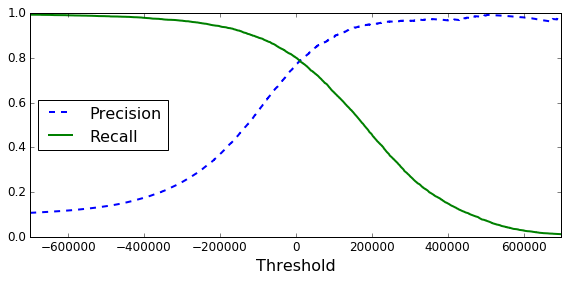

In [16]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="center left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

全てのy_scoresから、precision_recall_curve関数を用いることでPrecisionとRecallの関係を描画することができた。これによって、閾値を変化させたい際の両者の値がわかる。また、Precision x%を保つための閾値とRecallが求められる。

Precisionだけ何故ばらつきがあるのか。Recallは閾値をあげればそれだけ下がっていくが、Precisionは上がるだけでなく下がることもあるため。（図3.3の中央から一つ右にずらすと、4/5 = 80%だったものが、3/4=75%に落ちる）

In [17]:
(y_train_pred == (y_scores > 0)).all() # 全て一致するかどうか

True

In [18]:
#thresholdを少し高くしてみる。pred 90%のthresholdとrecallを求める。
y_train_pred_90 = (y_scores > 110000)

In [19]:
precision_score(y_train_5, y_train_pred_90)

0.90341360148187355

In [20]:
recall_score(y_train_5, y_train_pred_90)

0.62977310459324842

上記のように、適合率90%の場合、recallは62%まで低下した。目的に合わせた適切な閾値を定めることが重要である。

トレードオフをより直感的に理解するために、PrecisionとRecallのプロットをすると下記の図が得られる。

Saving figure precision_vs_recall_plot


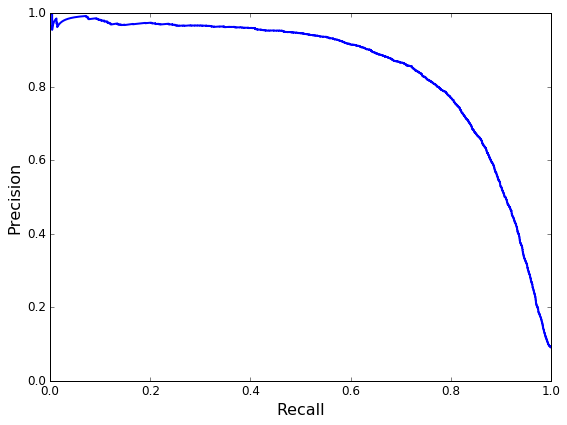

In [21]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

# ROC curves
Receiver Operating Characteristic (ROC) curve

二項分類ではよく使われるプロット方法で、上記の図と似ているが、PrecisionとRecallではなく、TPR (True Positive Rate)とFNR (False Positive Rate)をプロットしたものである。
上記同様にroc_curve関数を使って簡単に求めることができる。

TPRはTP / (TP + FN)なのでrecallと同一である。FPRは、1-specificity（特異度; TNR = (TN / (TN + FP))）である。すなわち、recall vs. 1 - specificityのプロットとも言える。


In [22]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


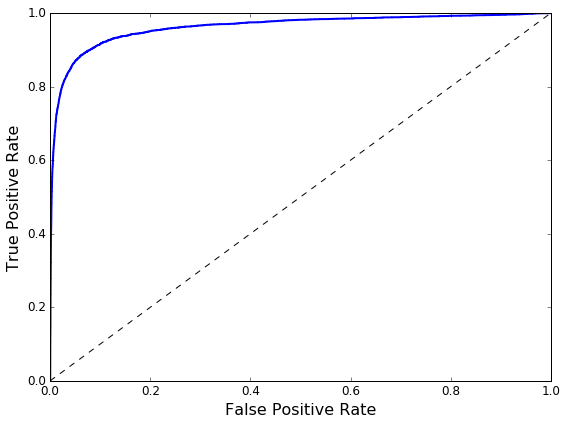

In [23]:
def plot_roc_curve(fpr, tpr, **options):
    plt.plot(fpr, tpr, linewidth=2, **options)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

ドットラインは、完全にランダムに分類した時の値。
左上に近づくほど良い分類器である。

また、Area Under the Curve（AUC）を使うことで定量的に比較することができる。

In [24]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.96244965559671547

ここで、ROC curveを使うべきかPrecision/Recall(PR)カーブを使うべきか考えてみよう。

データセットのうち、Positive(今回は5)がどれぐらいの割合を占めるかによる。もしも今回の例のようにpositiveデータが少なく（5 or not-5では5の割合がかなり少ない）、false negativeよりもfalse positiveを気にする場合は、PRカーブを用いたほうが良い。そうでなければ、ROCを用いた方が良い。今回の結果、ROCカーブは非常に綺麗でAUCも高い直を示すが、PRカーブではまだ右上に向かう余地がある。つまり、False positiveを減らす余地はあるが、False negativeを減らす余地はあまりない。（そもそもpositiveの方が少ないので、false positiveの影響を強く受けるため）

バイオマーカー探索などではROCカーブをよく見る気がします。


次に、RandomForestClassifier実装して、SGDClassifierと比較してみよう。

In [25]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_probas_forest # [[Proba. negative, Proba. porsitive]]

array([[ 1. ,  0. ],
       [ 0.9,  0.1],
       [ 1. ,  0. ],
       ..., 
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ]])

Saving figure roc_curve_comparison_plot


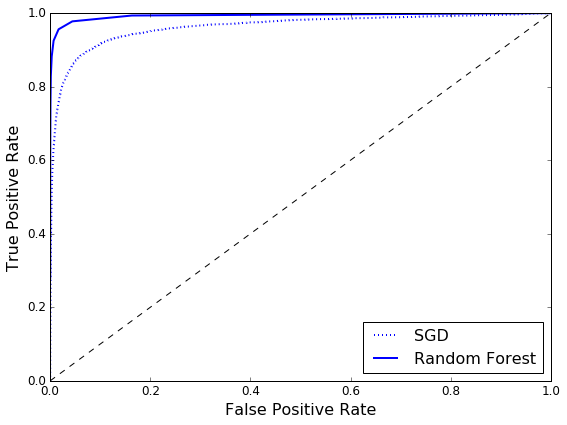

In [26]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [27]:
print("AUC")
print("Random Forest: ", roc_auc_score(y_train_5, y_scores_forest))
print("SGD: ", roc_auc_score(y_train_5, y_scores))

AUC
Random Forest:  0.9931243366
SGD:  0.962449655597


In [28]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [29]:
print("Precision (Random Forest): ", precision_score(y_train_5, y_train_pred_forest))
print("Precision (SGD): ", precision_score(y_train_5, y_train_pred))
print()

print("Recall (Random Forest): ", recall_score(y_train_5, y_train_pred_forest))
print("Recall (SGD): ", recall_score(y_train_5, y_train_pred))

Precision (Random Forest):  0.985297344744
Precision (SGD):  0.768713502035

Recall (Random Forest):  0.828260468548
Recall (SGD):  0.801328168235


ランダムフォレストの方が圧倒的に良いスコアを出した。正解率は98.5%であり、recallも82.8%と悪くない値である。

ここまでを通して、どのように二項分類器を扱うか、またその評価方法を学んできた。
（PR tradeoff, PR curves, ROC curves, ROC AUC scoresなどなど）

次は5 or not-5ではなく、より高度な分類を行う。

# Multiclass classification

2項（2クラス）分類器では2つのクラスに分けていたのに対し、多クラス分類器では2つ以上の分類を行うことができる。

ランダムフォレストやベイズなどは直接マルチクラスを扱うことができる。一方、他の分類器（SVMや線形分類）は2クラス分類しかできないため、多少工夫が必要である。

ここでは2クラス分類しかできない手法を用いて多クラス分類を行う2つの方法を紹介する。
今まで同様に0-9までの数字を用いて、次は0-9までの10クラスに分類することを目指す。

1. OvA (one-vs-all, or one-vs-rest). 5-detectorと同様に0-9まで10通り作成し、一番高いスコアのクラスに分類する。
2. OvO (one-vs-one). 各ペア毎に分類器を作成し、最も勝率の良いクラスが選ばれる。0vs1, 0vs2...。Nクラスの場合はN×N(N-1)/2分類器が必要。10クラスの場合は45個。

大抵のアルゴリズムの場合OvAの方が適しているが、SVMなどの場合はOvOの方が適している。SVMの場合は、小規模で多数のデータセットである方が計算は早いためである。

Scikit-Learnでは、2クラス分類器を使った多クラス分類をOvAにて自動で実行してくれる（SVMの場合OvOを使用）。

試しにSGD classifierを使ってみる。

In [30]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([ 5.])

非常に簡単に実行できた。結果として5と分類されているが、これは10通りの分類器を作成し、最もスコアの高かったものを返している。より詳細に見るためには、decision_functionでスコアを得ることができる。

In [31]:
some_digit_scores = sgd_clf.decision_function([some_digit])
print("Array: ", some_digit_scores)
print()
print("max:", np.argmax(some_digit_scores))
print()
print("クラス: ", sgd_clf.classes_)
sgd_clf.classes_[5]

Array:  [[-311402.62954431 -363517.28355739 -446449.5306454  -183226.61023518
  -414337.15339485  161855.74572176 -452576.39616343 -471957.14962573
  -518542.33997148 -536774.63961222]]

max: 5

クラス:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


5.0

最も高いスコアはクラス5であることが確認できた。今回はTPである。

もしScikit-LearndOvOかOvAを選んで使いたい場合、OneVsOneClassifierかOneVsRestClassifierを使えたば良い。
OvOを指定したコードは下記の通りである。

In [32]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

/Users/ac144809/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 5.])

In [33]:
#実際にクラスの数を数えると45個あることがわかる。
len(ovo_clf.estimators_)

45

ランダムフォレストの場合は、直接マルチクラス分類を行えるため、OvOかOvAなど考える必要はない。そのまま実行することができ、それぞれのクラスである確率はpredict_proba関数でよびだすことができる。

In [34]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [35]:
forest_clf.predict_proba([some_digit])

array([[ 0.1,  0. ,  0. ,  0.1,  0. ,  0.8,  0. ,  0. ,  0. ,  0. ]])

今回の場合、クラス5が80%、0と3が10%の可能性だと計算された。


次は、当然この分類器を評価する必要があるが、これも非常に簡単である。

In [36]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.84063187,  0.84899245,  0.86652998])

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.91011798,  0.90874544,  0.906636  ])

In [38]:
#　scaling結果の確認用
print(X_train[1][120:130])
print(X_train_scaled[1][120:130])

[  0  13 209 253 205   7   0   0   0   0]
[-0.16124756  0.11629241  3.92398912  3.90471001  2.56868342 -0.36220589
 -0.49939798 -0.52342832 -0.51761889 -0.48090242]


SGDでの判別結果は約85%であり、そこまで悪い値ではない。しかし、2章で扱ったようにインプットデータをスケーリングすると、上記のように90%まで精度を上げることができる。

## Error analysis

ここでは、より良いモデルを得るための1つの方法として、エラー解析について学ぶ。まずは、コンフュージョンマトリックス（混同行列）を作成する。

In [39]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]])

Saving figure confusion_matrix_plot


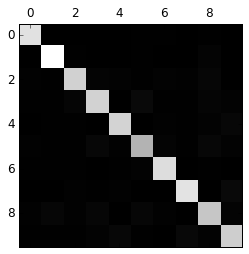

In [40]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mx)
    fig.colorbar(cax)

plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

2クラス分類と同様にコンフュージョンマトリックスを作成することができた。今回は10クラスあるので、見やすくするためにプロットすると上記Figが得られた。

比較的良く分類できているのがわかる。また、5だけ少し黒いようである。これはデータセットに5だけ少ないか、5だけミスが多いかのどちからであるが、このままではよくわからない。

エラーに着目するために、各行を各行の合計値で割ることで補正する。
また、エラーではない対角成分はnp.fill_diagonalで0に置換する。

Saving figure confusion_matrix_errors_plot


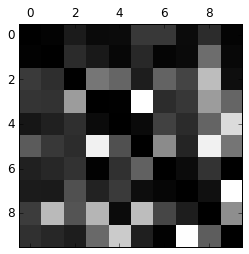

In [41]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

色が薄い部分ほど間違えて分類されていることを意味する。行が実際のクラスであり、列が予測されたクラスを表している。

8と9のクラスにエラーが多いことがわかる。逆に、0や1はよく分類されている（1を8と分類しているエラーもありはするが）。また、5を8と予測されるエラーが多いのに対し、8を5と予測するエラーはそこまで多くない。3と5は互いによく間違えられている。

コンフュージョンマトリックスを解析することで、分類器をよりよくする手法を得られるだろう。今回の場合、8や9の分類や3と5をより明確に分類する方法に時間を割くべきである。例えば、これらの数字に関するトレーニングデータをもっと集めたり、新しいフィーチャーを開発することもできる（文字にリングが何個含まれているかなど）。または、画像に前処理する工程を加えても良いだろう。

それぞれのエラーについて、なぜそれが起きるのか解析することも同様に重要ではあるが、難しいし時間もかかる。ここでは3と5について見てみよう。

In [42]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1    
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
        
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Saving figure error_analysis_digits_plot


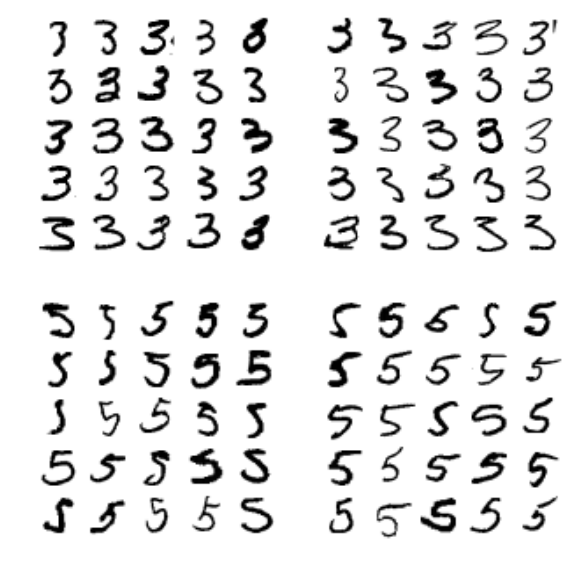

In [43]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221)
plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222)
plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223)
plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224)
plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

5×5のブロックが4つプロットされている。左側が3に分類されたグループ、右側が5に分類されたグループである。右上と左下はエラーである。

プロットしてみると、明らかにデータセットが悪い例も見つかる（左下のブロック、一番左の列の3番目などは、明らかに3に見える）。
しかし、ほとんどの場合人間ならば判別できるような文字がエラーとなっている。

これは、今回のアルゴリズムが直線モデルであるSGDを用いているためである。各ピクセルの濃さを単純に計算しているため、形の似た3と5を区別することは難しい。3を少し傾けて左側に寄せると、5と判別することは困難になる。今回の場合、前処理として中心を合わせたり傾きを修正するような画像処理をした方が良いかもしれない。

# Multilabel classification

今までは、1つのクラスにのみ分類してきたが、複数のクラスに分類したい場合もあるかもしれない。例えば、顔認識分類器の場合、1つの画像に複数の人が写っていた場合、それぞれの人について分類を行い、複数のラベルを返すべきだろう。複数の2クラスラベルを出力する分類手法を、マルチラベル分類と呼ぶ。

単純な例として、「数字が7以上か」と「奇数かどうか」という分類を行う。これには、KNeighborsClassifierを用いる。

In [11]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

結果として、5という画像はFalse, Trueを返した。7以上かという判定はFalseであり、奇数かという判定にはTrueを返しているため、予測は正解である。

マルチラベル分類器の評価方法は多岐にわたるが、一つの例としてF1スコアの平均を使う方法がある。今回はaverage="macro"を指定しているため重み付けされていないが、"weighted"を使うことで重み付けすることもできる。

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [ ]:
f1_score(y_train, y_train_knn_pred, average="macro")

# Multioutput classification
最後の分類器のパターンとして、マルチアウトプット-マルチクラス分類器（または単純にマルチアウトプット分類器）を紹介する。これは複数のラベルを、複数の値で出力する手法である。

例えば、画像のノイズ処理の例を考えてみよう。ノイズのある画像をインプットとし、強度を調節して綺麗な画像を出力する分類器である。この場合、1つのラベルにつき1つラベルがつくためマルチラベルであり、それぞれラベルは複数の値（0-255の範囲の強度）を持ちうる。

ここでは、MNISTのデータにノイズをあえて加えることでデータセットを作成する。

In [5]:
noise = rnd.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = rnd.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [6]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

Saving figure noisy_digit_example_plot


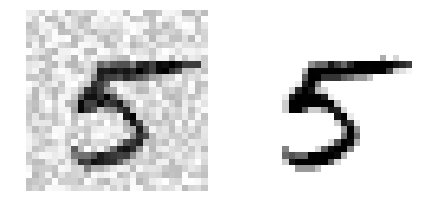

In [7]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

In [8]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Saving figure cleaned_digit_example_plot


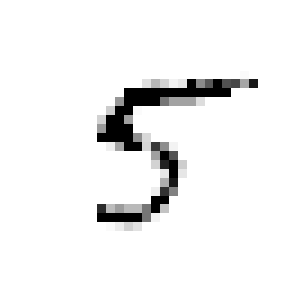

In [9]:
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")
plt.show()

In [10]:
clean_digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

# Extra material

## Dummy (ie. random) classifier

In [ ]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

In [ ]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

## KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

In [ ]:
y_knn_pred = knn_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

In [ ]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [ ]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

In [ ]:
knn_clf.fit(X_train_expanded, y_train_expanded)

In [ ]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_knn_expanded_pred)

In [ ]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

In [ ]:
plot_digit(ambiguous_digit)